# Outline
Important concepts:
1. What is regression
2. train-test split
3. numericalize discrete variables

# Import libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
url = 'https://raw.githubusercontent.com/mlda-outreach/xploreee_20190909/master/data/50_Startups.csv'
df = pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Linear regression with numerical values

## Using 1 predictor variable only

In [3]:
# represent data and label using numpy arrays

X = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)

(50, 1)
(50,)


In [4]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Fitting Linear Regression Model to the Training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
y_pred

array([104667.27805998, 134150.83410578, 135207.80019517,  72170.54428856,
       179090.58602508, 109824.77386586,  65644.27773757, 100481.43277139,
       111431.75202432, 169438.14843539])

Text(0, 0.5, 'Profit')

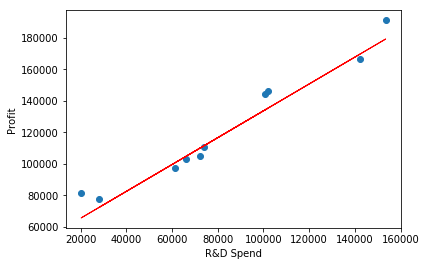

In [7]:
# Comapre predicted value with true value

plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color='red', linewidth=1)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

## Using all numerical predictor variables

In [8]:
# represent data and label using numpy arrays

X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)

(50, 3)
(50,)


In [9]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Fitting Linear Regression Model to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
y_pred

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

Text(0, 0.5, 'Profit')

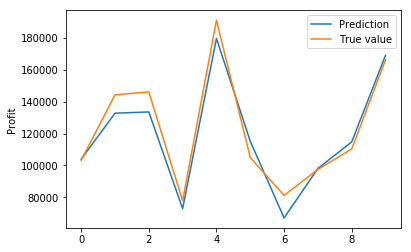

In [12]:
# Compare predicted value with true value

plt.plot(range(len(y_pred)), y_pred, label='Prediction')
plt.plot(range(len(y_pred)), y_test, label='True value')
plt.legend(loc='upper right')
plt.ylabel('Profit')

## Adding discrete variables

In [13]:
# represent data and label using numpy arrays

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)

(50, 4)
(50,)


In [14]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print('before transformation: ', X[:, 3])

before transformation:  ['New York' 'California' 'Florida' 'New York' 'Florida' 'New York'
 'California' 'Florida' 'New York' 'California' 'Florida' 'California'
 'Florida' 'California' 'Florida' 'New York' 'California' 'New York'
 'Florida' 'New York' 'California' 'New York' 'Florida' 'Florida'
 'New York' 'California' 'Florida' 'New York' 'Florida' 'New York'
 'Florida' 'New York' 'California' 'Florida' 'California' 'New York'
 'Florida' 'California' 'New York' 'California' 'California' 'Florida'
 'California' 'New York' 'California' 'New York' 'Florida' 'California'
 'New York' 'California']


In [15]:
X[:, 3] = labelencoder.fit_transform(df.iloc[:, 3])
print('after transformation: ', X[:, 3])

after transformation:  [2 0 1 2 1 2 0 1 2 0 1 0 1 0 1 2 0 2 1 2 0 2 1 1 2 0 1 2 1 2 1 2 0 1 0 2 1
 0 2 0 0 1 0 2 0 2 1 0 2 0]


In [16]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
print(pd.DataFrame(X, dtype='float').head())

     0    1    2          3          4          5
0  0.0  0.0  1.0  165349.20  136897.80  471784.10
1  1.0  0.0  0.0  162597.70  151377.59  443898.53
2  0.0  1.0  0.0  153441.51  101145.55  407934.54
3  0.0  0.0  1.0  144372.41  118671.85  383199.62
4  0.0  1.0  0.0  142107.34   91391.77  366168.42


/root/miniconda3/envs/fastai/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/root/miniconda3/envs/fastai/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [17]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# Fitting Linear Regression Model to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230166,  67851.69209676,  98791.73374686,
       113969.43533013, 167921.06569551])

Text(0, 0.5, 'Profit')

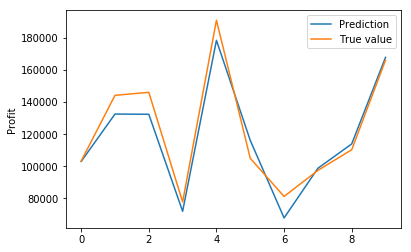

In [20]:
# Compare predicted value with true value

plt.plot(range(len(y_pred)), y_pred, label='Prediction')
plt.plot(range(len(y_pred)), y_test, label='True value')
plt.legend(loc='upper right')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

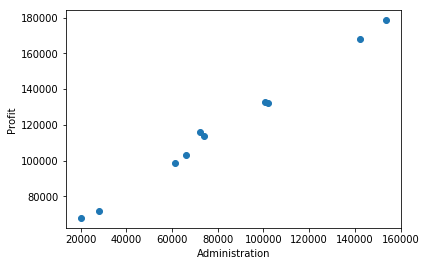

In [21]:
# Analyise relation between 'Administration' and 'Profit'

plt.plot(X_test[:,3], y_pred, linestyle='', marker='o')
plt.xlabel('Administration')
plt.ylabel('Profit')